# South African Language Identification Hack 2022

South Africa is a multiethnic country known for its extensive language variety. The power of language to advance democracy and improve the social, cultural, intellectual, economic, and political spheres of South African society makes it an essential weapon.

There are 11 official languages in the nation, all of which are given equal recognition. The majority of South Africans speak two or more of the official languages and are multilingual.

 <a id="one"></a>
## 1. Import Necessary Libraries
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Import necessary libraries ⚡ |
| :--------------------------- |
| We'd be importing all of the necessary libraries for the notebook to run smoothly..|



In [118]:
#import libraries
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
from nltk.tokenize import  word_tokenize

import warnings
warnings.simplefilter("ignore")
# imports for data visualisation

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from textblob import TextBlob
from nltk.probability import FreqDist
from wordcloud import WordCloud #Pip install wordcloud
import plotly.express as px
import plotly.graph_objects as go

# imports Checking Acuracy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics


# Models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline



<a id="Two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| To start importing our data, we make sure the raw data and notebook file are both in the same folder on our local system. Using the code below, we'll load the train data sets into our notebook. If the files aren't in the same folder, we'll have to point to the directory on our machine . To check that the data has loaded correctly, it is a good practice to call up the loaded data after it has been loaded.
The information would be saved in two different data frames, one for training and testing and the other for our EDA.|

---

In [119]:
# Importing the data sets
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [120]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


In [121]:
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlelela kgato eo."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho.
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini naticocisana.
4,5,Winste op buitelandse valuta.


<a id=three1></a>

#### 2.1 Set Pandas to enable viewing of all columns
Due to the length of th content of the message column, pandas cannot display all of them at once by default. While doing EDA and data cleansing, we will need to see all of the columns. When the dataframe is presented, the code below allows us to see the whole set of columns in our data collection. 

In [122]:
# Set option to display all columns
pd.set_option('display.max_colwidth', None)
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


<a id=three2></a>

#### 2.2 Check the "Shape" of the data-sets
As demonstrated by the shape of both datasets, the data has been separated into two sets. The form also shows that the training data set has three columns, but the test data set has just two. Our model is designed to forecast the column that is not present in the test set. We can look for that specific item by looking for the missing entity (Column) in the test data set. After looking at both datasets, the column may be identified as the sentiment column.

In [123]:
train.shape, test.shape

((33000, 2), (5682, 2))

<a id=three21></a>

#### 2.3 Use the ".column" function to view the columns in our data set
The number of columns and rows in our data set were revealed by the shape method, but the.columns function provides the names of all the columns in the dataframe.

In [124]:
train.columns, test.columns

(Index(['lang_id', 'text'], dtype='object'),
 Index(['index', 'text'], dtype='object'))

#### 2.4 Statistics
For text and lang id, there are 33000 features total in the dataset. There are 29948 unique characteristics in the text compared to 11 unique features in the lang id. The lang id occurs 3000and the text features 17 

In [125]:
train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu unelungelo lokudlulisela isililo sakho kusomkhandlu wezehlalakuhle ngokutlola incwadi uyithumele e-adresini elandelako kungakapheli amalanga amatjhumi alithoba ukusukela mhlazana uthola incwadi le
freq,3000,17


<a id="three"></a>
## 3. Data Preprocessing (Cleaning)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
| In this phase, we'll convert the data into a readable and desired format, as well as filter out the most relevant information.. |
# 

<a id=four1></a>

#### 3.1 Identifying Missing Values

It is important to identify the columns that have null entries as null values can affect the performance of our model. The "isnull" function shows the number of null values that are contained in each column of the dataset. This data set is relatively clean as this function shows that only the column "Valencia_pressure" features null values.

In [126]:
#Cheching if there are missing values in the Train dataset
train.isna().sum()

lang_id    0
text       0
dtype: int64

In [127]:
#Cheching if there are missing values in the Train dataset
test.isna().sum()

index    0
text     0
dtype: int64

In [128]:
#Cheching for unique values
train["lang_id"].nunique()

11

In [129]:
test["index"].nunique()

5682

<a id=four2></a>
### 3.2 Preprocessing the Dataset

#### Due to the presence of a non numerical column in our datasets, some preprocessing processes must be performed, including:


* letter casing :Converting all letters to upper case or lower case is called letter casing.

* Noise removal: Unwanted characters such as HTML tags, punctuation marks, special characters, white spaces, and so on are removed.



In [130]:
#removing links
train['text'] = train['text'].str.replace('http\S+|www.\S+', '', case=False)
train['text'] = train['text'].str.replace(r's*https?://S+(s+|$)', ' ',case=False).str.strip()
#removing links for test data
test['text'] = test['text'].str.replace('http\S+|www.\S+', '', case=False)
test['text'] = test['text'].str.replace(r's*https?://S+(s+|$)', ' ',case=False).str.strip()


In [131]:

stopwords_list = stopwords.words('english')

def preprocess(text):
    """This function takes in pandas dataframe, removes punctuation noises,contractions and lemmatize the text."""
    cleanText = re.sub(r'[-]',' ',text)
    cleanText = re.sub(r'[_]', ' ', cleanText)
    cleanText = re.sub(r'[^\w\s]','',cleanText)
    cleanText = re.sub('[0-9]+', '', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]',r'', cleanText)   
    cleanText = re.sub(r'@[a-zA-Z0-9\_\w]+', '', cleanText)#Remove @mentions
    cleanText = re.sub(r'#[a-zA-Z0-9]+', '', cleanText) #Remove '#' symbols
    cleanText = cleanText.lower() #Lowering case
    return cleanText

In [132]:
train["text"]=train["text"].apply(preprocess)
train.head()

,lang_id,text
0,xho,umgaqo siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefata gore o ba file dilo ka moka te le dumelelanego ka tona mohlala maleri a magolo a a omiwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go omela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


In [133]:
test["text"]=test["text"].apply(preprocess)
test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelela kgato eo
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye imitlolo engezelelako ukuqedelela ukutloliswa kwesibawo sakho
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini naticocisana
4,5,winste op buitelandse valuta


removing stopwords

In [134]:
stop_words = set(stopwords.words('english'))
train['text'] = train['text'].map(lambda x: list(map(str, filter(None, x.split(' '))))) ## Convert the cleaned message from string to list
train['text'] = train['text'].apply(lambda x: [word for word in x if word not in stop_words])
train.head(5)

,lang_id,text
0,xho,"[umgaqo, siseko, wenza, amalungiselelo, kumaziko, axhasa, ulawulo, lwesininzi, kunye, nokuthath, inxaxheba, kwabafazi, ezi, ziquka, phakathi, kwezinye, zazo, ikomishoni, yokulingana, ngokwesini, ikomishoni, yamalungelo, oluntu, lomzantsi, afrika]"
1,xho,"[dha, iya, kuba, nobulumko, bokubeka, umsebenzi, naphi, na, kwisebe, ngokusekwe, kwiimfuno, zokusebenza, zalo, emva, kokubonana, nomsebenzi, kunye, okanye, imanyano, yakhe, ukuba, ulandulo, lomntu, onjalo, alufanelekanga, dha, mayibize, uncedo, olufanelekileyo, elungelweni, layo]"
2,eng,"[province, kwazulu, natal, department, transport, invites, tenders, established, contractors, experienced, bridge, construction, construction, kwajolwayo, tugela, river, pedestrian, bridge, near, tugela, ferry, duration, project, months]"
3,nso,"[netefata, gore, ba, file, dilo, ka, moka, te, le, dumelelanego, ka, tona, mohlala, maleri, magolo, omiwago, go, fihlelela, meagong, e, metelele, scaffolds, bolokegilego, lefelo, la, maleba, la, go, omela, go, phela, gabotse, bjbj]"
4,ven,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ewa, maana, u, ya, nga, mulayo, wa, khomishini, ya, ndinganyiso, ya, mbeu, u, thetshelesa, mbilaelo, dzine, dza, tshimbilelana, na, tshialula, u, ya, nga, mbeu, nahone, ivhea, sa, foramu, ya, thungo, u, ya, nga, mulayo, wa, ndinganyiso]"


In [135]:
stop_words = set(stopwords.words('english'))
test['text'] = test['text'].map(lambda x: list(map(str, filter(None, x.split(' '))))) ## Convert the cleaned message from string to list
test['text'] = test['text'].apply(lambda x: [word for word in x if word not in stop_words])
test.head(5)

,index,text
0,1,"[mmasepala, fa, maemo, kgethegileng, letlelela, kgato, eo]"
1,2,"[uzakwaziswa, ngokufaneleko, nakungafuneka, eminye, imitlolo, engezelelako, ukuqedelela, ukutloliswa, kwesibawo, sakho]"
2,3,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,"[kube, inja, nelikati, betingevakala, kutsi, titsini, naticocisana]"
4,5,"[winste, op, buitelandse, valuta]"


In [136]:
def stri(cleanText):
    cleanText = ' '.join(cleanText)
    return cleanText

<a id=four3></a>

#### 3.3 Most Frequent Words

In [137]:
# train['text'] = train['text'].map(lambda x: list(map(str, filter(None, x.split(' '))))) ## Convert the cleaned message from string to list
from collections import Counter
cnt = Counter()
for message in train['text'].values:
    for word in message:
        cnt[word] += 1
        
cnt.most_common(5)

[('ya', 28245), ('le', 21204), ('ka', 18190), ('go', 17107), ('e', 15989)]

In [138]:
#Cheching the value cont of the language id
print("See distribution of messages per sentiment : ")
count = train.groupby("lang_id").count()["text"].reset_index().sort_values(by="text", ascending=False)
count.style.background_gradient(cmap="Purples")

See distribution of messages per sentiment : 


,lang_id,text
0,afr,3000
1,eng,3000
2,nbl,3000
3,nso,3000
4,sot,3000
5,ssw,3000
6,tsn,3000
7,tso,3000
8,ven,3000
9,xho,3000


<a id="five"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| We'll use a range of strategies in this part to maximize specific insights into our dataset, uncover underlying structure, extract relevant variables, find outliers and anomalies, test assumptions, and establish the optimum estimation parameters. In other words, we want to go deeper into our dataset in order to learn more about its behavior! |

---



<a id=five1></a>

### 5.1 Explore the Target Variable

For each of our categories, we want to know how our target variable behaves....let's dig in ⛏!

#### Visualization

Percentage contribution:
 xho    9.090909
eng    9.090909
nso    9.090909
ven    9.090909
tsn    9.090909
nbl    9.090909
zul    9.090909
ssw    9.090909
tso    9.090909
sot    9.090909
afr    9.090909
Name: lang_id, dtype: float64


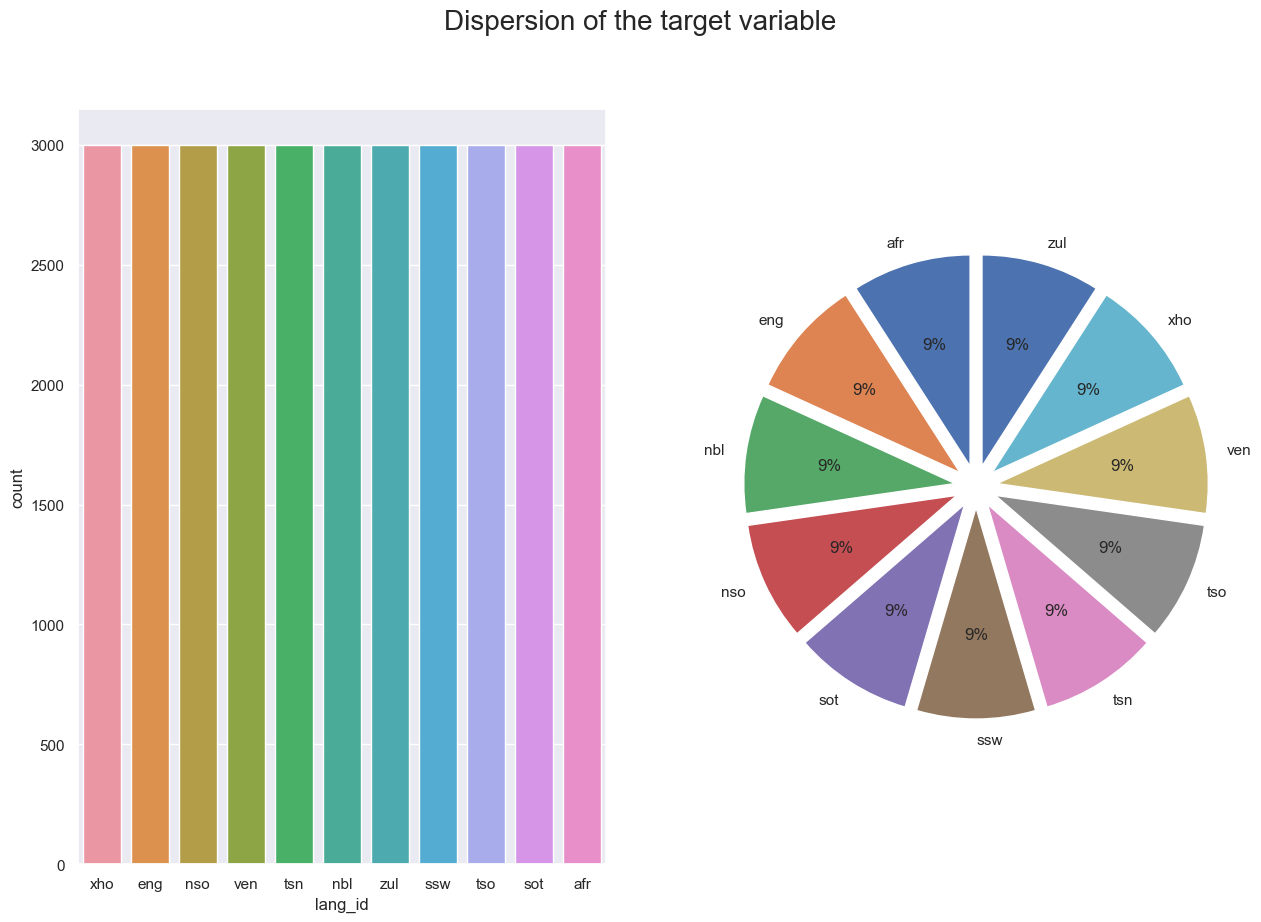

In [139]:
# Display target distribution

print("Percentage contribution:\n",train['lang_id'].value_counts(normalize=True)*100)

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(15, 10), 
                         dpi=100)

sns.countplot(train['lang_id'], ax=axes[0])

code_labels=['afr', 'eng', 'nbl', 'nso',"sot","ssw","tsn","tso","ven","xho","zul"]
axes[1].pie(train['lang_id'].value_counts(),
            labels= code_labels,
            autopct='%1.0f%%',
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

fig.suptitle('Dispersion of the target variable', fontsize=20)
plt.show()

<a id=five22></a>

#### 5.2.2 Visualize Tweet Length for each Class 

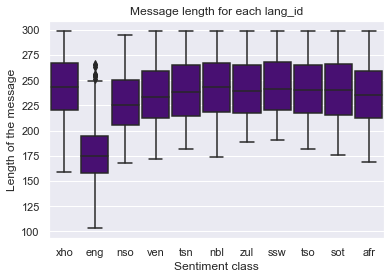

In [140]:
# Get the length of each message for each class
train["text"] = train["text"].apply(stri)
train['text_length'] = train['text'].apply(lambda x: len(x))
sns.boxplot(x=train['lang_id'], y=train['text_length'], data=train, width = 0.9, color = 'indigo')
sns.set(rc={'figure.figsize':(10,5)})
plt.ylabel('Length of the message')
plt.xlabel('Sentiment class')
plt.title('Message length for each lang_id')
plt.show()

<a id=five4></a>

#### 5.4 Investigative  Text Analysis
From here, we'll delve further into our text, looking into each term and its frequency of occurrence individually.

---

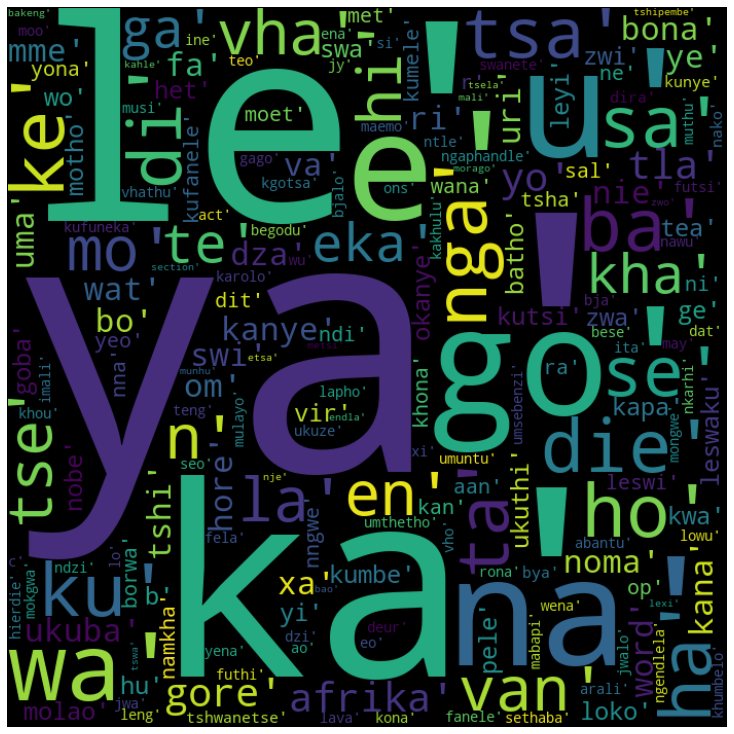

In [141]:
train['text'] = train['text'].map(lambda x: list(map(str, filter(None, x.split(' '))))) ## Convert the cleaned message from string to list
words = train['text']
allwords = []
for wordlist in words:
    allwords += wordlist
    
mostcommon = FreqDist(allwords).most_common(10000)
wordcloud = WordCloud(width=700, height=700, background_color=
                      'black').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<a id="seven"></a>
## 6. Data or Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we would be looking at one of feature selection in text data namely the `tfidfVectorizer`,split the data and also prepare it for training. |

In [142]:
train["text"] = train["text"].apply(stri)
train

,lang_id,text,text_length
0,xho,umgaqo siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika,220
1,xho,dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga dha mayibize uncedo olufanelekileyo elungelweni layo,248
2,eng,province kwazulu natal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months,212
3,nso,netefata gore ba file dilo ka moka te le dumelelanego ka tona mohlala maleri magolo omiwago go fihlelela meagong e metelele scaffolds bolokegilego lefelo la maleba la go omela go phela gabotse bjbj,197
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso,237
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka poponthwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham,271
32996,sot,modise mosadi na ntse sa utlwe hore thabang rata ho iketsa sengangele jwang hona jwale ke mona se bolela ka moo batlang ho lokollelwa ngwana wa hae ka teng wena jwale batla ho jarisa nna melato ya hae jwalo ka ha eka ke nna ya mo rommeng hore mathakake le banana ba motse oo kaofela,282
32997,eng,closing date submission completed tenders august h late submissions considered submissions must enclosed sealed envelope addressed chief executive officer address,162
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene ujungene nesohlwayo sokudliwa imali okanye ukuvalelwa ixesha elingadluliyo kwiinyanga ezintandathu okanye kuzo zombini isohlwayo sokudliwa imali okanye ukuvalelwa,228


#### 6.1 Creating our X and y Metrics


In [143]:
# X_tra = train_real.drop(['lang_id','target'], axis=1)
X = train["text"]
y = train["lang_id"]

#### 6.2 Splitting data into train and validation sets

Separating data into training and validation sets is an important part of evaluating our models. 
In our case we will randomly split the train data into 80% train and 20% validation. 
After our model is trained with the train data we then use it to make predictions for the target using the validation set,Because the data in the validation set already contains known values for the target variable this will make it easy  for us to asses our model's accuracy.

In [144]:
X_train , X_test , y_train , y_test = train_test_split(X , y, stratify=y,
                                                       test_size =0.2, 
                                                       random_state=42)

In [145]:
#The several models that will be used on the dataset and compared for performance
algo = [LogisticRegression(random_state =42 , max_iter=5000), 
       MultinomialNB(), 
       LinearSVC(random_state=42), 
       RidgeClassifier(random_state=42)
       
       ]

In [146]:
##Make tokenizer callable
def wordd_tokenizer(text):
    return word_tokenize(text)

<a id='seven3'></a>

#### 7.3 Training Models

Each model is trained via a distinct pipeline that accepts raw text input, transforms it into numerical data, and establishes the classifier's default parameters.

In [147]:
def _performace_assesment(*args , **kwargs):
  model_stats = {}
  for clf in algo:
    model = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english', tokenizer=wordd_tokenizer,max_df=0.9, ngram_range=(1, 5), analyzer= 'char')),
                      ('clf' , clf)
                      ])
    
    model.fit(X_train, y_train) #Training
    model_pred = model.predict(X_test) #Testing

    # Dictionary of Models Performances
    model_stats[clf.__class__.__name__] = {
        'F1-Macro':metrics.f1_score(y_test, model_pred, average='macro'),
        'F1-Accuracy':metrics.f1_score(y_test, model_pred, average='micro'),
        'F1-Weighted':metrics.f1_score(y_test, model_pred, average='weighted')}
  return pd.DataFrame.from_dict(model_stats, orient='index')

In [148]:
performance = _performace_assesment(algo , X_train , X_test , y_train , y_test)
performance.to_csv('performance.csv')
dataframe = pd.read_csv('performance.csv', index_col = 0)
dataframe.sort_values('F1-Weighted', ascending=False)

### Hyperparameter Tuning and Model Validation

The process of selecting a group of ideal hyperparameters for a learning algorithm is known as hyperparameter tuning. On the other hand, a hyperparameter is a variable or input whose value is predetermined before the training process starts. When a tuple of hyperparameters are tuned, the result is an ideal model that minimizes a predetermined loss function on input data.

In [ ]:
def _param_tuning(*args , **kwargs):
  best_params = {}

  for clf in algo:
    model = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(1, 5), analyzer= 'char')),
                      ('clf' , clf)])
    model.fit(X_train, y_train) #Training
    
    #Get models performing parameters
    params = model.get_params()
    model_name = clf.__class__.__name__ 
    model_name = {}
    for key in params:
      if key.startswith("clf"):
        if len(key) < 5:
          model_name['model'] = params[key]
        else:
            model_name[key[5:]] = params[key]
    best_params[clf.__class__.__name__] = model_name
  return best_params

In [ ]:
best_params = _param_tuning(algo, X_train, y_train)

In [ ]:
#Best parameters
best_params

{'LogisticRegression': {'model': LogisticRegression(max_iter=5000, random_state=42),
  'C': 1.0,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 5000,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': 42,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False},
 'MultinomialNB': {'model': MultinomialNB(),
  'alpha': 1.0,
  'class_prior': None,
  'fit_prior': True},
 'LinearSVC': {'model': LinearSVC(random_state=42),
  'C': 1.0,
  'class_weight': None,
  'dual': True,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'loss': 'squared_hinge',
  'max_iter': 1000,
  'multi_class': 'ovr',
  'penalty': 'l2',
  'random_state': 42,
  'tol': 0.0001,
  'verbose': 0},
 'RidgeClassifier': {'model': RidgeClassifier(random_state=42),
  'alpha': 1.0,
  'class_weight': None,
  'copy_X': True,
  'fit_intercept': True,
  'max_iter': None,
  'normalize': 'deprecated',
  'pos

<a id="eight"></a>
## 8. Modelling and Evaluation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling and Evaluation ⚡ |
| :--------------------------- |
| In this section we would be:we would be evaluating all the models. |

---

Multinomial Naive Bayes Classifier was the first modeling technique employed. With discrete features, it is appropriate for categorization (e.g., word counts for text classification).

In [ ]:
#model
model1 = MultinomialNB()

In [ ]:
Vectorize = TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(1, 5), analyzer= 'char')
X_train = Vectorize.fit_transform(X_train)
X_test = Vectorize.transform(X_test)

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True,
                                   random_state=42)

**Stratified K-Folds cross-validator.**

To divide data into train and test sets, Stratified K-Folds cross-validator offers train/test indices.

A KFold variant that returns stratified folds is this cross-validation object. The folds are created by keeping track of the sample percentages for each class.

In [ ]:
# selecting the  best_params
best_params[algo[1].__class__.__name__]

{'model': MultinomialNB(),
 'alpha': 1.0,
 'class_prior': None,
 'fit_prior': True}

In [ ]:
alpha = list(np.linspace(0.1,0.02,4))
param_grid = dict(alpha=alpha)
grid_search = GridSearchCV(estimator= model1,
                           param_grid=param_grid,
                           scoring='f1_weighted',
                           cv=stratified_kfold,
                           error_score=0,
                           n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)
prediction = grid_search.predict(X_test)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

In [ ]:
print(f'Cross-validation score: {cv_score}')
print(f'Test score: {test_score}')
grid_search.best_params_    
grid_search.best_estimator_

Cross-validation score: 0.9998484846840803
Test score: 0.9993938128155686


MultinomialNB(alpha=0.1)

In [ ]:
#model
model2 = RidgeClassifier()

The second model applied to the dataset was **Ridge Classifier**

This classifier turns the target values into the values "-1, 1" before treating the issue as a regression issue (multi-output regression in the multiclass case).

In [ ]:
best_params[algo[3].__class__.__name__]

{'model': RidgeClassifier(random_state=42),
 'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': 42,
 'solver': 'auto',
 'tol': 0.001}

In [ ]:
alpha = list(np.linspace(0.15,0.4, 5))
param_grid = dict(alpha=alpha)
grid_search = GridSearchCV(estimator= model2,
                           param_grid=param_grid,
                           scoring='f1_weighted',
                           cv=stratified_kfold,
                           error_score=0,
                           n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)
prediction = grid_search.predict(X_test)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

In [ ]:
print(f'Cross-validation score: {cv_score}')
print(f'Test score: {test_score}')
grid_search.best_params_    
grid_search.best_estimator_

Cross-validation score: 0.9993560591687981
Test score: 0.9990906558284217


RidgeClassifier(alpha=0.2125)

## Predictions

The output of each individual estimator is stacked in stacked generalization, and a classifier is used to calculate the final prediction. Using each estimator's output as the input for a final estimator enables stacking, which lets us take use of each estimate's strengths.

Consider that although final estimator is trained using cross-validated predictions of the base estimators using cross val predict, estimators_ are fitted to the whole X.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y,  stratify=y, test_size=0.4, random_state =1)

In [ ]:
vect = TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(2, 6), analyzer= 'char')
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [ ]:
multiNB1 = MultinomialNB(alpha=0.1)
multiNB2 = MultinomialNB(alpha=0.1)

estimators = [('multiNB1', multiNB1), ('multiNB2', multiNB2)]
final_est = RidgeClassifier(alpha=0.2125)

In [ ]:
stacking_NB2 = StackingClassifier(estimators = estimators,
                           final_estimator = final_est,
                           passthrough = True)

In [ ]:
stacking_NB2.fit(X_train , y_train)

In [ ]:
pred = stacking_NB2.predict(X_test)

In [ ]:
model_stats = {}
model_stats[stacking_NB2.__class__.__name__] = {
        'F1-Macro':metrics.f1_score(y_test, pred, average='macro'),
        'F1-Accuracy':metrics.f1_score(y_test, pred, average='micro'),
        'F1-Weighted':metrics.f1_score(y_test, pred, average='weighted')}
pd.DataFrame.from_dict(model_stats, orient='index')

,F1-Macro,F1-Accuracy,F1-Weighted
StackingClassifier,0.999848,0.999848,0.999848


In [ ]:
count_vec = CountVectorizer(ngram_range=(3,7), analyzer= 'char')
X_train , X_test , y_train , y_test = train_test_split(X, y, stratify=y,test_size=0.05, random_state =1)
X_train = count_vec.fit_transform(X_train)
X_test = count_vec.transform(X_test)

In [ ]:
test['text'] = test['text'].apply(stri)
X = test['text']
Vectorize = vect.transform(X)

In [ ]:
test['lang_id'] = stacking_NB3.predict(Vectorize)

In [ ]:
submission = test[['index', 'lang_id']]
submission.to_csv('silas2.csv',index=False)
submission